In [1]:
from qiskit import QuantumCircuit, assemble, Aer,transpile
from qiskit.visualization import plot_histogram

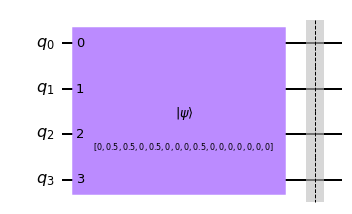

In [2]:
sim = Aer.get_backend('qasm_simulator')  # Tell Qiskit how to simulate our circuit
qc = QuantumCircuit(4)
initial_state = [0,0.5,0.5,0,0.5,0,0,0,0.5,0,0,0,0,0,0,0] # Any random initial state
qc.initialize(initial_state, [0,1,2,3]) # Initialize the qubits in the state `initial_state`
qc.save_statevector() # Save statevector
qc.draw(output='mpl')

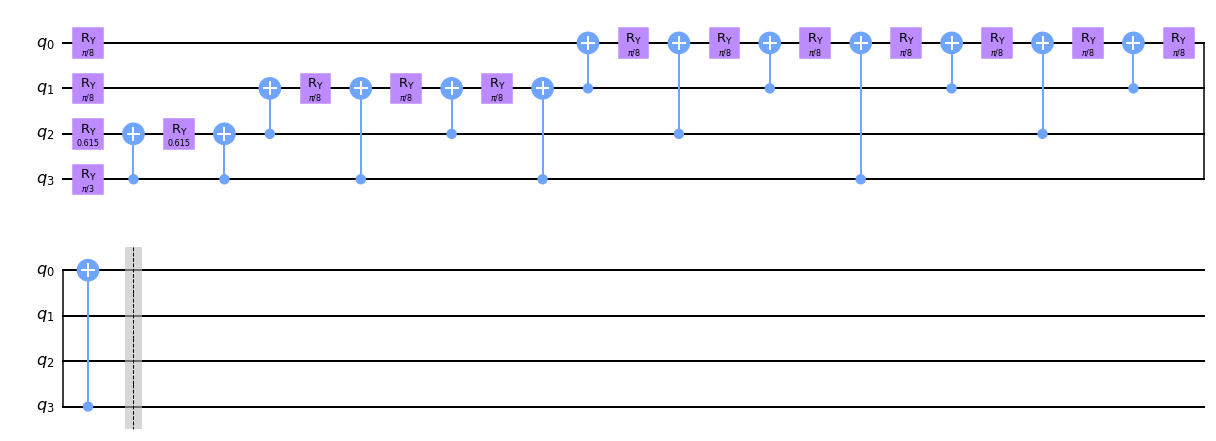

In [3]:
qc_basis = transpile(qc, sim,optimization_level=3)
qc_basis.draw(output='mpl')

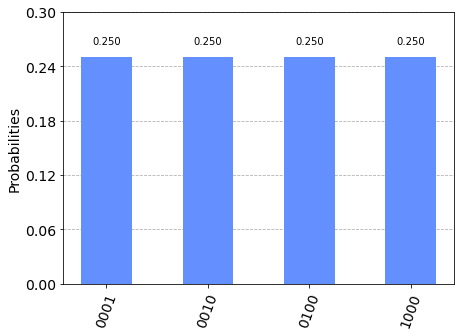

In [4]:
transpiled_qc = transpile(qc, sim)
qobj = assemble(transpiled_qc, shots=1024)
job = sim.run(qobj)

# Get the results from the computation
results = job.result()
answer = results.get_counts()
plot_histogram(answer)